In [1]:
import numpy as np
import lmdb
import sys
caffe_root = '..'
sys.path.insert(0,caffe_root+'/python')
import caffe
import os
import cv2
from scipy import misc
from os.path import expanduser
home_dir = expanduser("~")
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
%matplotlib inline
from IPython.display import clear_output
from pycocotools.coco import COCO
from PIL import Image

In [2]:
experiment_name = 'coco-600-fcn8'
caffe.set_device(5)
caffe.set_mode_gpu()
itr = 42000

In [3]:
net = caffe.Net(caffe_root+'/models/'+experiment_name+'/deploy.prototxt',caffe_root+'/models/'+experiment_name+'/'+experiment_name+'_'+str(itr)+'.caffemodel',caffe.TEST)

In [4]:
dataDir=home_dir + '/data/coco'
with open(dataDir+'/test_img.lst','r') as f:
    test_img_lst = f.readlines() 
with open(dataDir+'/test_label.lst','r') as f:
    test_label_lst = f.readlines() 

In [5]:
color = []
for i in range(81):
    c = np.random.random((1, 3)).tolist()[0]
    color.append(c)
color[0] = np.array([0,0,0])
cmap1 = LinearSegmentedColormap.from_list("my_colormap",color, N=81)

In [10]:
idx = np.random.randint(500)
im = Image.open(test_img_lst[idx][:-1])
label = Image.open(test_label_lst[idx][:-1])
label = np.array(label, dtype=np.float32)
im = np.array(im, dtype=np.float32)
if im.ndim==2:
    im = np.expand_dims(im,axis=2)
    im = np.tile(im, (1,1,3))
im = im[:,:,::-1]
im -= np.array((104.00698793,116.66876762,122.67891434))
im = im.transpose((2,0,1))
im = np.expand_dims(im,axis=0)
label = np.expand_dims(label,axis=0)
label = np.expand_dims(label,axis=0)
net.blobs['data'].reshape(*im.shape)
net.blobs['data'].data[...] = im
net.blobs['label'].reshape(*label.shape)
net.blobs['label'].data[...] = label
net.forward()
pred = np.argmax(np.squeeze(net.blobs['score'].data),axis = 0)

True labels are: [ 0 57 63 64 65 66 67 74]
Predicted labels are: [ 0  1  2  3  4  5  6  7  8  9 10 14 16 21 22 23 26 32 37 38 39 40 52 57 58
 61 62 63 64 67 70 73 74 75 78]


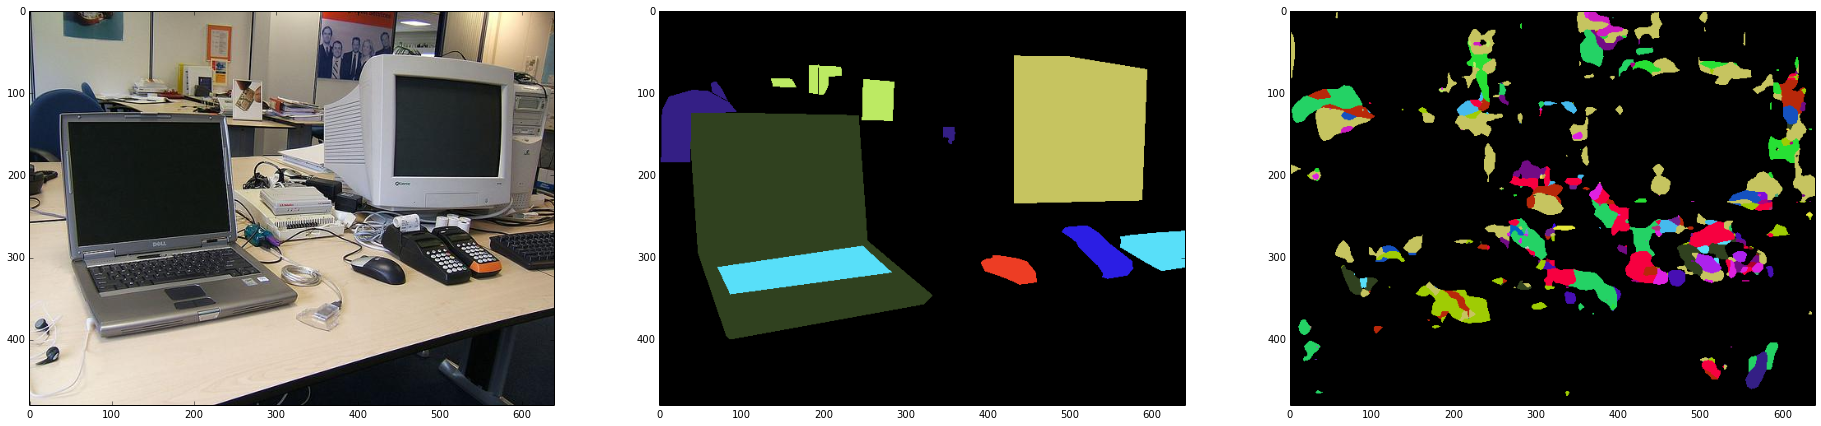

In [11]:
plt.figure(figsize=(16*2, 12*2))
print "True labels are: " + str(np.unique(label.astype(np.uint8)))
plt.subplot(131)
temp = (np.transpose(np.squeeze(im),(1,2,0))+np.array((104.00698793,116.66876762,122.67891434))).astype(np.uint8)
plt.imshow(temp[:,:,::-1])
plt.subplot(132)
plt.imshow(np.squeeze(label),cmap = cmap1,vmin=0, vmax=80)
plt.subplot(133)
plt.imshow(pred,cmap = cmap1,vmin=0, vmax=80)
print "Predicted labels are: " + str(np.unique(pred).astype(np.uint8))

In [8]:
color[1]

[0.14145397436200058, 0.8254031330344385, 0.3977096390865621]